# K-means Segmenting
0. groups in 1-2-3d
1. 2d pca kmeans
2. labels vs feature analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from sklearn.decomposition import PCA
import os
from sklearn.preprocessing import OrdinalEncoder
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

list numerical features instead of dropping consider transforming

In [2]:
df=pd.read_csv('Live_20210128.csv')
df=df.drop(columns=['Column1','Column2','Column3','Column4'])
ord_enc = OrdinalEncoder()
df["status_type_code"] = ord_enc.fit_transform(df[["status_type"]])
X=df.drop(columns=['status_id','status_type','status_published'])

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_code
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,3.0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1.0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,3.0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1.0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1.0


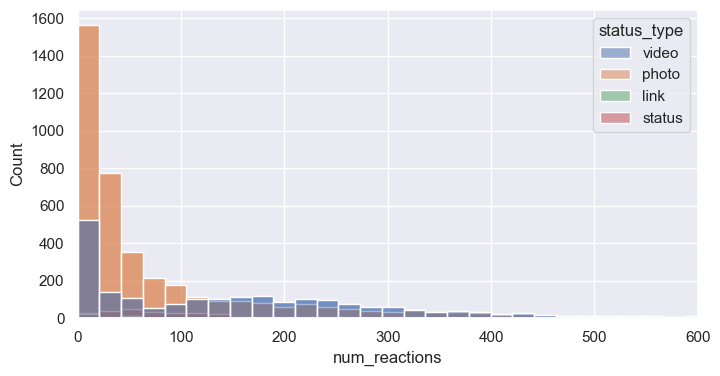

In [5]:
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(data=df,x='num_reactions',hue='status_type')
plt.xlim(0,600)
plt.show()

# Clustering Intuition
Grouping data into clusters/segments

## 1 Dimensional Clustering

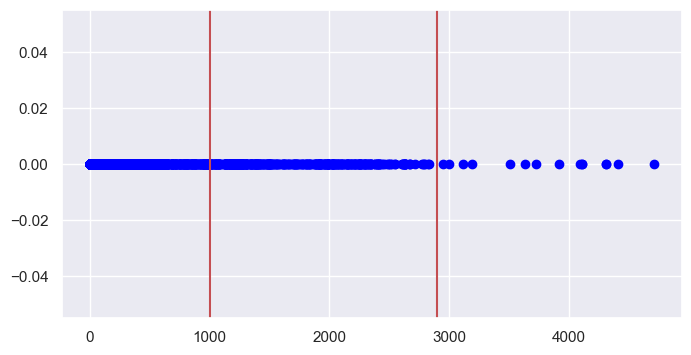

In [32]:
# 1D
plt.scatter(df['num_reactions'], np.zeros_like(df['num_reactions']), color='blue')
plt.axvline(1000,-1,1,color='r')
plt.axvline(2900,-1,1,color='r')
# plt.axvline(3400,-1,1,color='r')
plt.show()

## 2 Dimensional Clustering

31.821631205673757
218.95638359329868


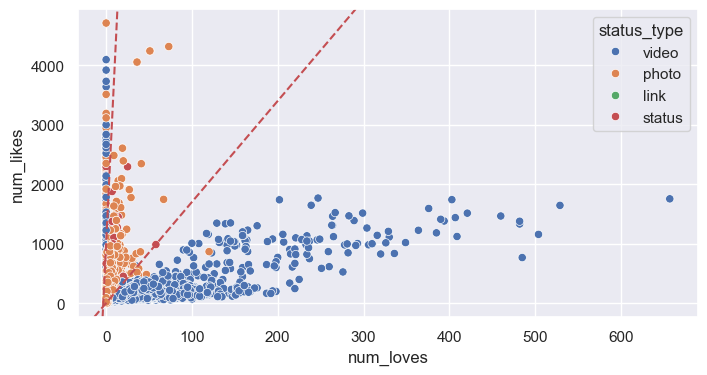

In [26]:
ax=sns.scatterplot(data=df,x='num_loves',y='num_likes',hue='status_type')
print(df[df['num_loves']>0]['num_loves'].mean())
print(df[df['num_likes']>0]['num_likes'].mean())
# plt.axvline(32,0,5000,color='r')
# plt.axhline(219,0,5000,color='r')
ax.axline((0, 0), slope=17, color='r', linestyle='--', label="y=x line")
ax.axline((0, 1000), slope=300, color='r', linestyle='--', label="y=x line")

plt.show()

## 3 Dimensional Clustering

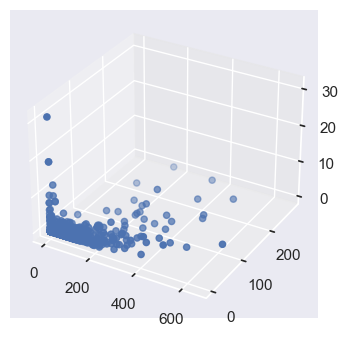

In [33]:
ax = plt.axes(projection='3d')
ax.scatter3D(df['num_loves'], df['num_wows'], df['num_angrys']) #, c=df['num_loves'], cmap='Greens')
plt.show()

## K-Means Algorithm

In [99]:
def kmeans_fit_plot(X,n,x_feature,y_feature):
    X=X[list([x_feature,y_feature])]
    # kmeans
    kmeans = KMeans(n_clusters=n, random_state=0) 
    label = kmeans.fit_predict(X)
    center=kmeans.cluster_centers_
    np.set_printoptions(suppress=True)
    print(center)

    colors=['red','yellow','blue','green','orange','purple','pink']
    u_labels = np.unique(label)
    
    fig, ax = plt.subplots()
    for i in u_labels:
        ax.scatter(df[label == i][x_feature],df[label == i][y_feature],c=colors[i],label=i)
    ax.scatter(center[:,0] , center[:,1]  , s = 40, color = 'k')
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend()
    plt.show()

[[ 103.60387985    0.5034418 ]
 [1035.37002342    2.42388759]
 [2242.36796537    2.84415584]]


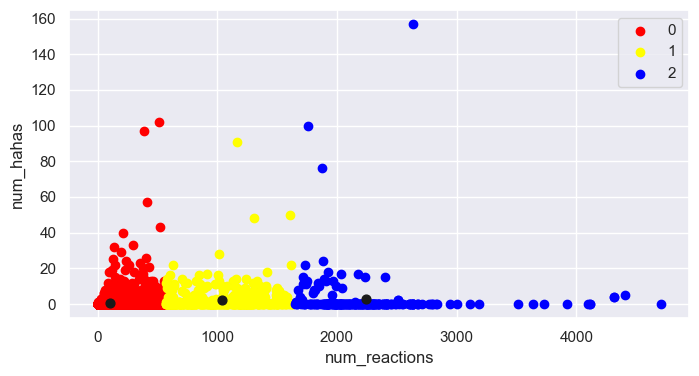

In [100]:
kmeans_fit_plot(X,3,'num_reactions','num_hahas')

## Dimension Reduction with PCA-2d

Reduce dimensionality without loss of information

$$
d(x,y) = \sqrt{sum_{i=1}^{d} (x_i - y_i)^2}
$$

Euclidian distance breaks down in higher dimension (d>1,000)

Principal component analysis reorients the feature space to span the directions of greatest variance


In [9]:
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_code
0,529,512,262,432,92,3,1,1,0,3.0
1,150,0,0,150,0,0,0,0,0,1.0
2,227,236,57,204,21,1,1,0,0,3.0
3,111,0,0,111,0,0,0,0,0,1.0
4,213,0,0,204,9,0,0,0,0,1.0


In [39]:
X.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type_code'],
      dtype='object')

In [40]:
X.shape

(7050, 10)

Scale data before PCA and K-means, because both depend on distance and variance.

In [67]:
# pca    
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)
pc1=X_pca[:,0]
pc2=X_pca[:,1]
pca_df = pd.DataFrame(X_pca,columns=["PC1", "PC2"])
pca_df["status_type"] = df["status_type"].values
X_pca.shape

(7050, 2)

In [68]:
print("variance covered in principal component 1 and principal component 2")
print(pca.explained_variance_ratio_)
print("cumulative variance covered in 1 componenet and in 2 components")
print(np.cumsum(pca.explained_variance_ratio_))

variance covered in principal component 1 and principal component 2
[0.66306765 0.32732326]
cumulative variance covered in 1 componenet and in 2 components
[0.66306765 0.99039092]


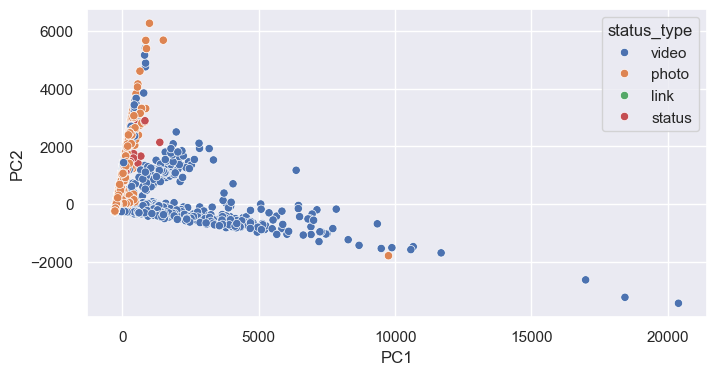

In [74]:
sns.scatterplot(data=pca_df,x="PC1",y="PC2",hue="status_type",legend="full")
plt.show()

In [75]:
print(pca_df["status_type"].value_counts())


status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


# Clustering

In [119]:
def plot_labeled_clusters(X, n):
    X = np.asarray(X)  
    kmeans = KMeans(n_clusters=n, random_state=0)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    for i in np.unique(labels):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label=i)

    plt.scatter(centroids[:, 0], centroids[:, 1], s=30, c="k")
    plt.legend()
    plt.show()
    return labels, kmeans

No PCA K-means

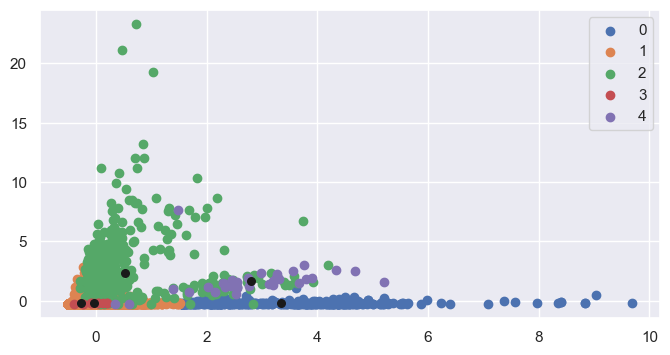

(5, 10)


In [140]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
labels, kmeans =plot_labeled_clusters(X_scaled,5)
print(kmeans.cluster_centers_.shape)

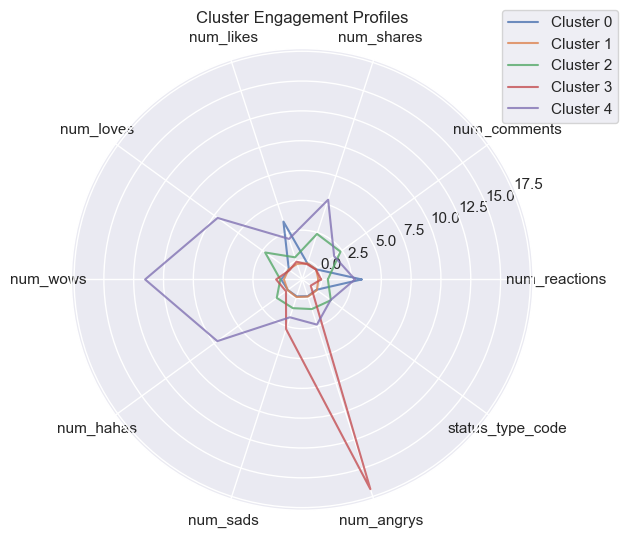

In [141]:
labels = X.columns
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.r_[angles, angles[0]]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

for i, centroid in enumerate(kmeans.cluster_centers_):
    values = np.r_[centroid, centroid[0]]
    ax.plot(angles, values, label=f"Cluster {i}", alpha=0.8)

ax.set_thetagrids(angles[:-1]*180/np.pi, labels)
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.title("Cluster Engagement Profiles")
plt.show()


PCA K-Means

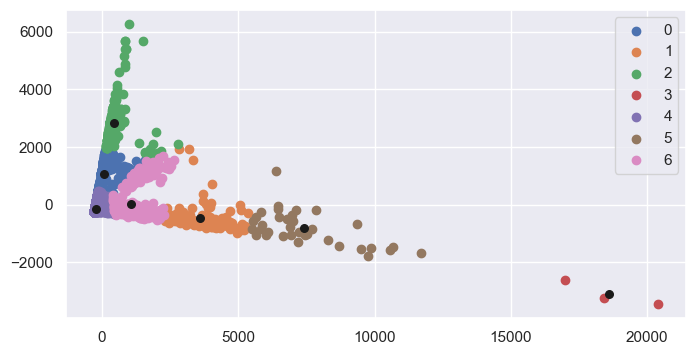

In [142]:
labels, kmeans =plot_labeled_clusters(X_pca,7)

## Optimal K Clusters - Elbow Plot

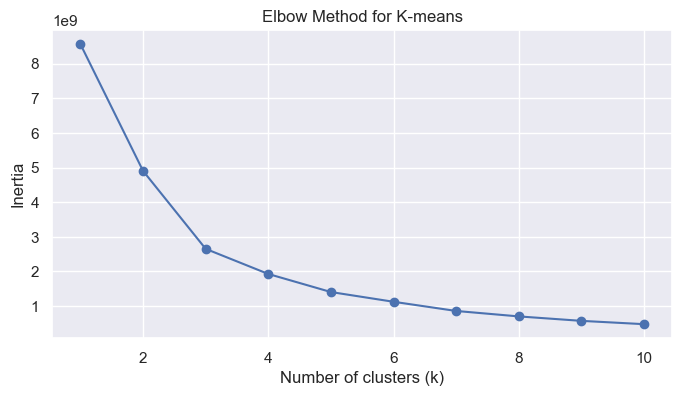

In [129]:
inertia = []

K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)   # or X_scaled if clustering in original space
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-means")
plt.show()

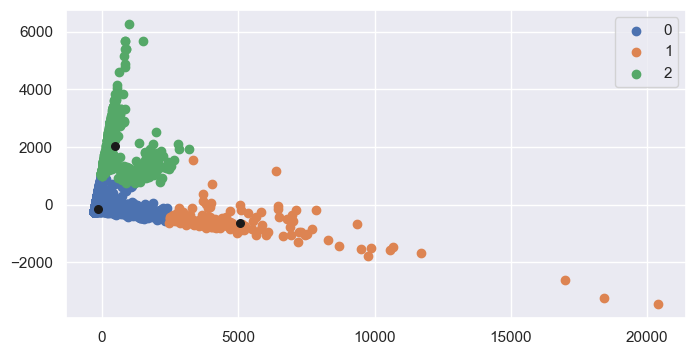

In [143]:
labels, kmeans=plot_labeled_clusters(X_pca,3)

In [146]:
print("X shape:", X.shape)
print("KMeans centers shape:", kmeans.cluster_centers_.shape)


X shape: (7050, 10)
KMeans centers shape: (3, 2)


In [152]:

pca_df["dist_to_centroid"] = kmeans.transform(X_pca).min(axis=1)
pca_df["cluster_pca_kmeans"] = labels
pca_df


,PC1,PC2,status_type,dist_to_centroid,cluster_pca_kmeans
0,372.670328,308.269645,video,682.654955,0
1,-242.585684,-59.785648,photo,125.539018,0
2,11.501600,-11.721598,video,200.263456,0
3,-252.701137,-113.974861,photo,111.104614,0
4,-227.065467,21.618669,photo,179.610570,0
...,...,...,...,...,...
7045,-258.407290,-144.543135,photo,114.448848,0
7046,-277.546481,-247.344369,photo,172.655889,0
7047,-281.063657,-266.108107,photo,187.688335,0
7048,-176.777883,216.126404,photo,355.340813,0


In [157]:
df['cluster'] = labels
df['cluster'].value_counts()

cluster
0    6429
2     484
1     137
Name: count, dtype: int64

<AxesSubplot:xlabel='num_loves', ylabel='Count'>

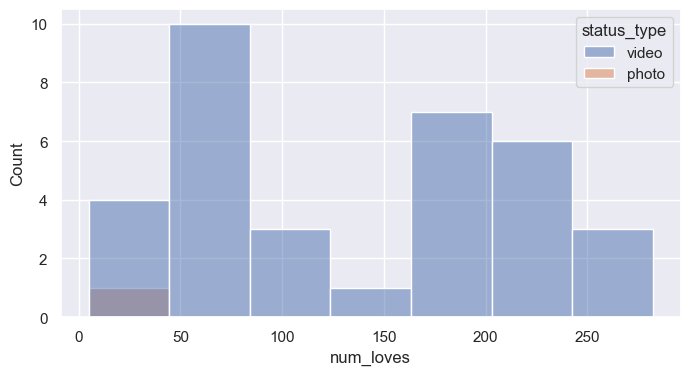

In [56]:
sns.histplot(df_1,x='num_loves',hue='status_type')

<AxesSubplot:xlabel='num_reactions', ylabel='Count'>

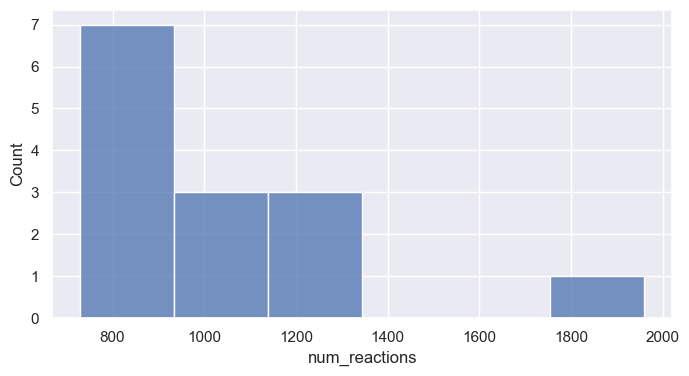

In [50]:
a=df_1[df_1['num_reactions']>=708]
sns.histplot(a,x='num_reactions')

<AxesSubplot:xlabel='num_reactions', ylabel='count'>

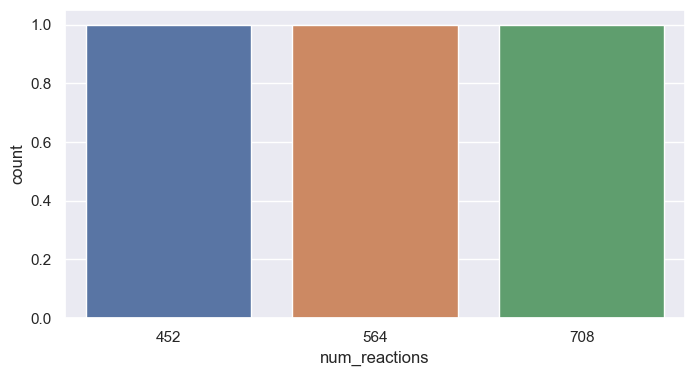

In [39]:
sns.countplot(x=df_5['num_reactions'])